# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

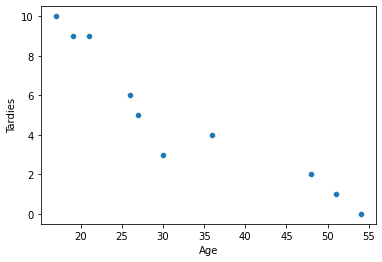

In [2]:
import seaborn as sns
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Parece una correlación lineal bastante fuerte.



Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [3]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [4]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Covarianza vs Correlación
La covarianza provee la dirección (positiva, negativa, cercana a zero), de la relación lineal de dos variables, mientras la correlación contiene la direción y la intensidad
La covarianza es no acotada pues su tamaño depende de la escala de las variables, mientras que la correlación toma valores entre -1 y 1 independiente de la escala de las variables.
La covarianza no está estándarizada, la correlación si.

Vemos en el ejemplo cómo la covarianza puede toma un valor de 45 negativo, es decir: están inversamente relacionadas. Si vemos la Correlación que es de -0.9 podemos añadir, además de que es negativa (inversmente relacionadas) que es una relación muy fuerte ya que está estandarizada a +/-(0...1)

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X=student_data[['Age']], y=student_data.Tardies)

LinearRegression()

In [6]:
beta1=lr.coef_[0]


In [7]:
beta0=lr.intercept_


Plot your regression model on your scatter plot.

<function matplotlib.pyplot.show(close=None, block=None)>

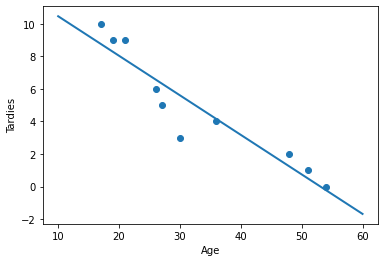

In [8]:
import numpy as np
from matplotlib import pyplot as plt

X=np.linspace(10, 60, num=5)
y_gorro = beta0 + beta1 * X #Línea de regresión
plt.scatter(student_data.Age,student_data.Tardies) # pintar los puntos
plt.plot(X, y_gorro, lw=2) # pintamos la línea de regresión
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.show

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

Parece que sí que la relación que hemos modelado podría ser, con los datos que tenemos, un modelo de predicción a considerar. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
df_cars=pd.read_csv('vehicles.csv')
print(df_cars.shape)
df_cars.sample(7)

(35952, 15)


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
28308,Pontiac,Bonneville,1993,3.8,6.0,Automatic 4-spd,Front-Wheel Drive,Large Cars,Regular,16.480500,17,26,20,444.350000,1650
28257,Pontiac,6000 Wagon,1985,2.5,4.0,Automatic 3-spd,Front-Wheel Drive,Midsize-Large Station Wagons,Regular,14.982273,19,26,22,403.954545,1500
1941,BMW,335i xDrive,2015,3.0,6.0,Automatic (S8),All-Wheel Drive,Compact Cars,Premium,13.733750,20,30,24,377.000000,1700
31205,Subaru,Impreza Wagon AWD,1997,2.2,4.0,Automatic 4-spd,4-Wheel or All-Wheel Drive,Small Station Wagons,Regular,14.330870,21,28,23,386.391304,1450
428,Aston Martin,Lagonda,1988,5.3,8.0,Automatic 3-spd,Rear-Wheel Drive,Subcompact Cars,Regular,36.623333,8,10,9,987.444444,3700
8532,Chrysler,Town and Country/Voyager/Grand Voy. 2WD,2001,3.8,6.0,Automatic 4-spd,Front-Wheel Drive,Minivan - 2WD,Regular,18.311667,16,22,18,493.722222,1850
19266,Jaguar,S-Type 4.2 Litre,2006,4.2,8.0,Automatic 6-spd,Rear-Wheel Drive,Midsize Cars,Premium,17.347895,16,24,19,467.736842,2150


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [10]:
df=df_cars[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
df

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [11]:
df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']].corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Evidentemente el consumo anual, ya sea en barriles o en coste (porque entre ellas están directamente relacionadas) parece que son variables practicamente directamente relacionadas con la variable a estimar.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Vamos a relacionar n variables descriptivas de cada vehículo con las emisiones de CO2. vamos a realiaza un Forward and Backward Stepwise Regression.

In [12]:
#en primer lugar partimos de un modelo nulo
df.rename(columns={'CO2 Emission Grams/Mile':'CO2'}, inplace=True)
df.rename(columns={'Fuel Barrels/Year':'BarrelsYear'}, inplace=True)
df.rename(columns={'Fuel Cost/Year':'CostYear'}, inplace=True)
df.rename(columns={'Combined MPG':'CombinedMPG'}, inplace=True)
print(df)
results = smf.ols("CO2 ~ 1", data = df).fit()
results.summary()

       Year  Cylinders  BarrelsYear  CombinedMPG  CostYear         CO2
0      1984        4.0    19.388824           17      1950  522.764706
1      1984        6.0    25.354615           13      2550  683.615385
2      1985        4.0    20.600625           16      2100  555.437500
3      1985        6.0    25.354615           13      2550  683.615385
4      1987        6.0    20.600625           16      2550  555.437500
...     ...        ...          ...          ...       ...         ...
35947  2013        3.0     9.155833           36      1100  244.000000
35948  2014        3.0     9.155833           36      1100  243.000000
35949  2015        3.0     9.155833           36      1100  244.000000
35950  2016        3.0     9.155833           36      1100  246.000000
35951  2016        3.0     9.417429           35      1150  255.000000

[35952 rows x 6 columns]
/home/emilio/.local/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to b

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                nan
Time:                        19:56:51   Log-Likelihood:            -2.2285e+05
No. Observations:               35952   AIC:                         4.457e+05
Df Residuals:                   35951   BIC:                         4.457e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    475.3163      0.628    756.965      0.000     474.086     476.547
==============================================================================
Omnibus:                     3608.604   Durbin-Watson:                   0.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5686.437
Skew:                           0.742   Prob(JB):                         0.00
Kurtosis:                       4.263   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
df

,Year,Cylinders,BarrelsYear,CombinedMPG,CostYear,CO2
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [14]:
    #Diseñamos un modelo con todas las posibles combinaciones de todas las variables.
    results = smf.ols("CO2 ~ Year * Cylinders * BarrelsYear * CombinedMPG * CostYear", data = df).fit()
    results.summary()                        


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 3.406e+05
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:56:51   Log-Likelihood:            -1.2121e+05
No. Observations:               35952   AIC:                         2.425e+05
Df Residuals:                   35921   BIC:                         2.428e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                       -4.786e+04   3244.395    -14.752      0.000   -5.42e+04   -4.15e+04
Year                                               24.1647      1.618     14.936      0.000      20.994      27.336
Cylinders                                        7563.0163    589.433     12.831      0.000    6407.711    8718.322
Year:Cylinders                                     -3.8099      0.294    -12.950      0.000      -4.386      -3.233
BarrelsYear                                      1862.8576     92.995     20.032      0.000    1680.585    2045.130
Year:BarrelsYear                                   -0.9215      0.046    -19.850      0.000      -1.012      -0.830
Cylinders:BarrelsYear                            -276.4613     13.899    -19.890      0.000    -303.704    -249.218
Year:Cylinders:BarrelsYear                          0.1380      0.007     19.882      0.000       0.124       0.152
CombinedMPG                                       197.6193     29.458      6.708      0.000     139.880     255.359
Year:CombinedMPG                                   -0.0993      0.015     -6.733      0.000      -0.128      -0.070
Cylinders:CombinedMPG                             -39.4447      7.484     -5.270      0.000     -54.114     -24.775
Year:Cylinders:CombinedMPG                          0.0197      0.004      5.269      0.000       0.012       0.027
BarrelsYear:CombinedMPG                            42.6883      8.518      5.011      0.000      25.992      59.384
Year:BarrelsYear:CombinedMPG                       -0.0220      0.004     -5.182      0.000      -0.030      -0.014
Cylinders:BarrelsYear:CombinedMPG                  -6.2065      1.511     -4.109      0.000      -9.167      -3.246
Year:Cylinders:BarrelsYear:CombinedMPG              0.0032      0.001      4.283      0.000       0.002       0.005
CostYear                                           38.0230      2.079     18.290      0.000      33.948      42.098
Year:CostYear                                      -0.0191      0.001    -18.459      0.000      -0.021      -0.017
Cylinders:CostYear                                 -6.7490      0.307    -22.017      0.000      -7.350      -6.148
Year:Cylinders:CostYear                             0.0034      0.000     22.278      0.000       0.003       0.004
BarrelsYear:CostYear                                0.0995      0.017      5.964      0.000       0.067       0.132
Year:BarrelsYear:CostYear                       -4.914e-05   8.34e-06     -5.892      0.000   -6.55e-05   -3.28e-05
Cylinders:BarrelsYear:CostYear                     -0.0034      0.002     -1.614      0.107      -0.008       0.001
Year:Cylinders:BarrelsYear:CostYear              1.646e-06   1.07e-

In [15]:
#El modelo resultante tiene un R2 de 0.996
# vemos que lo que más influye es el número de cilindros porque tiene un coficiente realmente alto.abs

In [16]:
#estos son todos los parametros de nuestro modelo n dimensional con todas sus multiplicaciones posibles
results.params

Intercept                                         -47862.001381
Year                                                  24.164700
Cylinders                                           7563.016258
Year:Cylinders                                        -3.809860
BarrelsYear                                         1862.857590
Year:BarrelsYear                                      -0.921460
Cylinders:BarrelsYear                               -276.461255
Year:Cylinders:BarrelsYear                             0.138047
CombinedMPG                                          197.619285
Year:CombinedMPG                                      -0.099274
Cylinders:CombinedMPG                                -39.444716
Year:Cylinders:CombinedMPG                             0.019721
BarrelsYear:CombinedMPG                               42.688287
Year:BarrelsYear:CombinedMPG                          -0.021990
Cylinders:BarrelsYear:CombinedMPG                     -6.206522
Year:Cylinders:BarrelsYear:CombinedMPG  

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [17]:
x=[1,3,4,6,8,9,11,14]
y=[1,2,4,4,5,7,8,13]
df=pd.DataFrame({'inv':x, 'att':y})
df

,inv,att
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='inv', ylabel='att'>

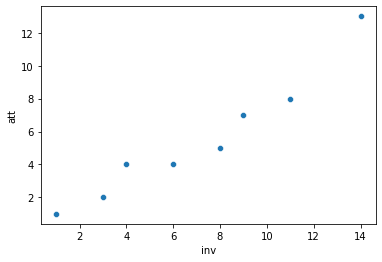

In [18]:
sns.scatterplot(data=df, x='inv', y='att')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [19]:
# parece que es una regresión lineas de pendiente positiva luego tendrá una correlación positiva y segramente bastante alta. su beta 0 tb será cercano a cero pues pasa por el origen

In [20]:
    results = smf.ols("att ~ inv", data = df).fit()
    results.summary()   

/home/emilio/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    att   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           0.000102
Time:                        19:56:51   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4394      0.759     -0.579      0.584      -2.297       1.418
inv            0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#estos son los parámetros de la regresión lineal
results.params

Intercept   -0.439394
inv          0.848485
dtype: float64

In [22]:
b0=results.params[0]
b0

-0.4393939393939379

In [23]:
b1=results.params[1]
b1

0.8484848484848484

In [24]:
X=np.linspace(0,18)
y_gorro=b1*X+b0

In [25]:
#con un Rcuadrado
results.rsquared

0.9316696375519905

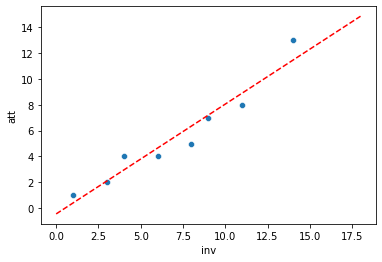

In [26]:
sns.scatterplot(data=df, x='inv', y='att')
ax=sns.lineplot(x=X,y=y_gorro, color='r')
ax.lines[0].set_linestyle("--") 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [27]:
#La verdad es que no veo mucho outlier pero por decir uno digo el que invita a
#podríamos calcular el error 

ypred = results.predict(df.inv)
df2=df
df2['predic']=ypred
df2['error']=abs(df2.att-df2.predic)
df2['error_r']= df2.error/df2.inv
df2

,inv,att,predic,error,error_r
0,1,1,0.409091,0.590909,0.590909
1,3,2,2.106061,0.106061,0.035354
2,4,4,2.954545,1.045455,0.261364
3,6,4,4.651515,0.651515,0.108586
4,8,5,6.348485,1.348485,0.168561
5,9,7,7.196970,0.196970,0.021886
6,11,8,8.893939,0.893939,0.081267
7,14,13,11.439394,1.560606,0.111472


In [28]:
#de todos los datos el que más me preocuparía sería el del mayor error relativo ya que es más preocupante equivocarse en 1 con solo 4 invitados que en 1 con 14 invitados
# Pero quiero suponer que el tener una fiesta de 14 puede que debiera tener un modelo diferente, así que nos quedamos con los valores (0,11] invitados y desechamos el último
#results2=smf.ols([df])


In [29]:
df=df[['inv','att']]
df=df[:-1]

In [30]:
df

,inv,att
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [44]:
    results2 = smf.ols("att ~ inv", data = df).fit()
    results2.summary() 

/home/emilio/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    att   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           0.000264
Time:                        20:01:18   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3233      0.513      0.630      0.556      -0.996       1.642
inv            0.6842      0.075      9.127      0.000       0.492       0.877
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.689
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.379
Skew:                           0.284   Prob(JB):                        0.827
Kurtosis:                       2.012   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
b0=results2.params[0]
b1=results2.params[1]
results2.params

Intercept    0.323308
inv          0.684211
dtype: float64

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [47]:
#tenemos un rsq de 0.94, antes 0.93
X=np.linspace(0,18)
y_gorro2=b1*X+b0

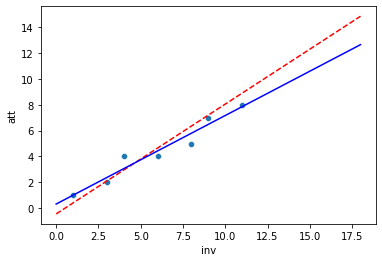

In [51]:
sns.scatterplot(data=df, x='inv', y='att')
ax=sns.lineplot(x=X,y=y_gorro, color='r')
ax.lines[0].set_linestyle("--") 
bx=sns.lineplot(x=X,y=y_gorro2, color='b')
